<a href="https://colab.research.google.com/github/DaniilRyb/OIRS/blob/master/DZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.nasa.gov/sites/default/files/images/nasaLogo-570x450.png)

# Домашнее задание по ОИРС Рыбаков Даниил ИУ8-83
# NASA - Nearest Earth Objects
https://www.kaggle.com/code/hainescity/nasa-nearest-earth-objects-eda-pt-br/input
### Описание
#### В космическом пространстве существует бесконечное количество объектов. Некоторые из них ближе, чем мы думаем. Хотя мы могли бы подумать, что расстояние в 70 000 км потенциально не может причинить нам вреда, но в астрономическом масштабе это очень небольшое расстояние и может нарушить многие природные явления. Таким образом, эти объекты/астероиды могут оказаться вредными. Следовательно, разумно знать, что нас окружает и что из этого может нам навредить. Таким образом, этот набор данных составляет список сертифицированных НАСА астероидов, которые классифицируются как ближайший к Земле объект.

#### Исходный датасет содержит различные параметры/характеристики, на основе которых конкретный астероид, который уже классифицирован как ближайший к Земле объект, может представлять опасность, а может и не представлять.

In [860]:
import pandas as pd
import numpy as np

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

neo = pd.read_csv('neo.csv')
df = neo_v2 = pd.read_csv('neo_v2.csv')
neo

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
4994,3843615,(2019 QD2),0.127220,0.284472,68008.686531,6.074898e+07,Earth,False,21.60,True
4995,54053855,(2020 RY2),0.012722,0.028447,56146.668376,2.078349e+07,Earth,False,26.60,False
4996,3132517,(2002 PY39),0.133216,0.297879,24868.153345,1.252865e+07,Earth,False,21.50,False
4997,3383901,(2007 RT1),0.201630,0.450858,146102.744654,6.675484e+07,Earth,False,20.60,False


In [861]:
neo_v2

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
4994,3843615,(2019 QD2),0.127220,0.284472,68008.686531,6.074898e+07,Earth,False,21.60,True
4995,54053855,(2020 RY2),0.012722,0.028447,56146.668376,2.078349e+07,Earth,False,26.60,False
4996,3132517,(2002 PY39),0.133216,0.297879,24868.153345,1.252865e+07,Earth,False,21.50,False
4997,3383901,(2007 RT1),0.201630,0.450858,146102.744654,6.675484e+07,Earth,False,20.60,False


In [862]:
print(neo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4999 non-null   int64  
 1   name                4999 non-null   object 
 2   est_diameter_min    4999 non-null   float64
 3   est_diameter_max    4999 non-null   float64
 4   relative_velocity   4999 non-null   float64
 5   miss_distance       4999 non-null   float64
 6   orbiting_body       4999 non-null   object 
 7   sentry_object       4999 non-null   bool   
 8   absolute_magnitude  4999 non-null   float64
 9   hazardous           4999 non-null   bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 322.3+ KB
None


In [863]:
print(neo_v2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4999 non-null   int64  
 1   name                4999 non-null   object 
 2   est_diameter_min    4999 non-null   float64
 3   est_diameter_max    4999 non-null   float64
 4   relative_velocity   4999 non-null   float64
 5   miss_distance       4999 non-null   float64
 6   orbiting_body       4999 non-null   object 
 7   sentry_object       4999 non-null   bool   
 8   absolute_magnitude  4999 non-null   float64
 9   hazardous           4999 non-null   bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 322.3+ KB
None


In [864]:
print(df["hazardous"].value_counts() / len(df))

False    0.868774
True     0.131226
Name: hazardous, dtype: float64


In [865]:
print(df.nunique())

id                    3880
name                  3880
est_diameter_min       866
est_diameter_max       866
relative_velocity     4998
miss_distance         4988
orbiting_body            1
sentry_object            1
absolute_magnitude     866
hazardous                2
dtype: int64


### Группировка наблюдений по идентификатору и столбцу с суммой потенциально опасных астероидов


In [866]:
grouped = df.groupby("id").sum()["hazardous"]
grouped

id
2000719     0
2001580     0
2001620     2
2001864     0
2001865     0
           ..
54269715    0
54271300    0
54271303    0
54271304    0
54272760    0
Name: hazardous, Length: 3880, dtype: int64

### Создаем столбец с двоичной переменной, которая измеряет, есть ли более одного опасного наблюдения для этого идентификатора

In [867]:
df["prev_hazard"] = df.apply(lambda row: grouped[row["id"]] > 1, axis="columns")
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,prev_hazard
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,False


### Переопределемим df только со столбцами, которые необходимы для анализа, разделенными между yColumn и xColums

In [868]:
yColumn = ["hazardous"]
xColumns = ["relative_velocity", "absolute_magnitude", "miss_distance", "prev_hazard"]
df = df[xColumns + yColumn]
df.describe().round(2)

,relative_velocity,absolute_magnitude,miss_distance
count,4999.00,4999.00,4999.00
mean,51453.35,22.92,42934243.37
std,25969.84,3.01,20111317.63
min,963.19,13.82,119995.44
25%,31697.63,20.60,27531010.03
50%,48182.16,22.70,44797485.97
75%,67137.24,25.20,60165824.10
max,193386.98,31.50,74774041.65


### Проанализируем другие переменные путем их распределения, разделив их на "опасные" и "не опасные".

In [869]:
# Давайте начнем с группировки всего с "hazardous"

nHz = df[(df["hazardous"] == False)]
hz = df[(df["hazardous"] == True)]

# Создать функцию для отображения на графике распределения переменной "hazardous" и "non-hazardous"
def compare_dist_hazard(columnName):

    f, ax = plt.subplots(figsize=(6, 5))

    ax = sns.kdeplot(nHz[columnName], ax=ax, color="tab:blue", label="Not Hazardous")
    ax = sns.kdeplot(hz[columnName], ax=ax, color="tab:orange", label="Hazardous")

    ax.set_xlabel("")
    ax.set_yticklabels([])
    ax.set_title(columnName + " grouped by hazardous")
    ax.legend()
    plt.show()

### Вызываем функцию для "relative_velocity"



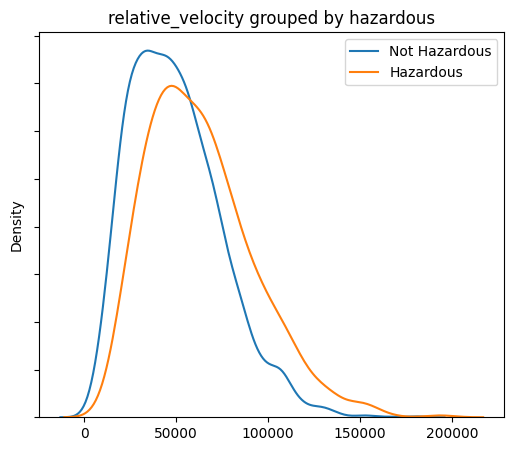

In [870]:
compare_dist_hazard("relative_velocity")

### Вызываем функцию для "absolute_magnitude"



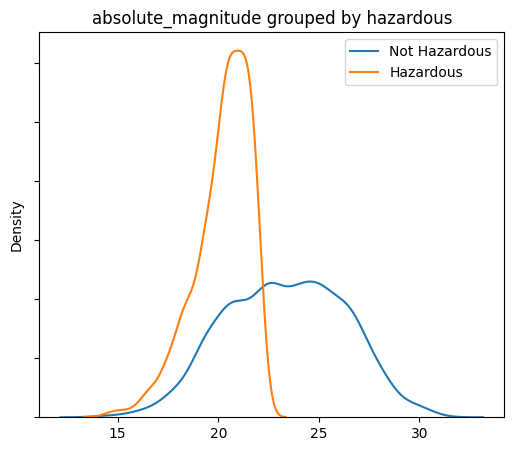

In [871]:
compare_dist_hazard("absolute_magnitude")

### Вызываем функцию для "miss_distance"


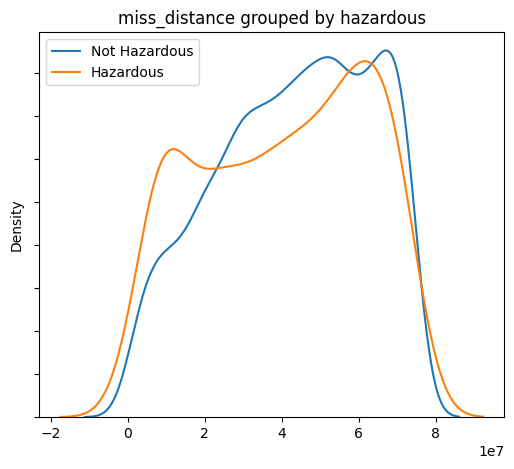

In [872]:
compare_dist_hazard("miss_distance")

### Корреляционная матрица

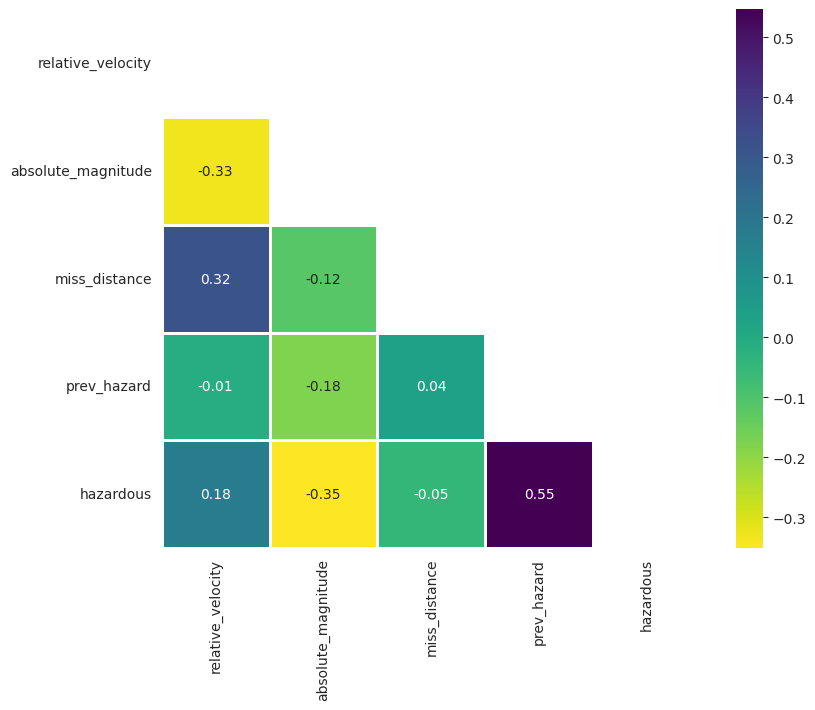

In [873]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="viridis_r")

In [874]:
y = df["hazardous"]
X = df.drop("hazardous", axis="columns")

In [875]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
df
df.to_csv("test.csv")

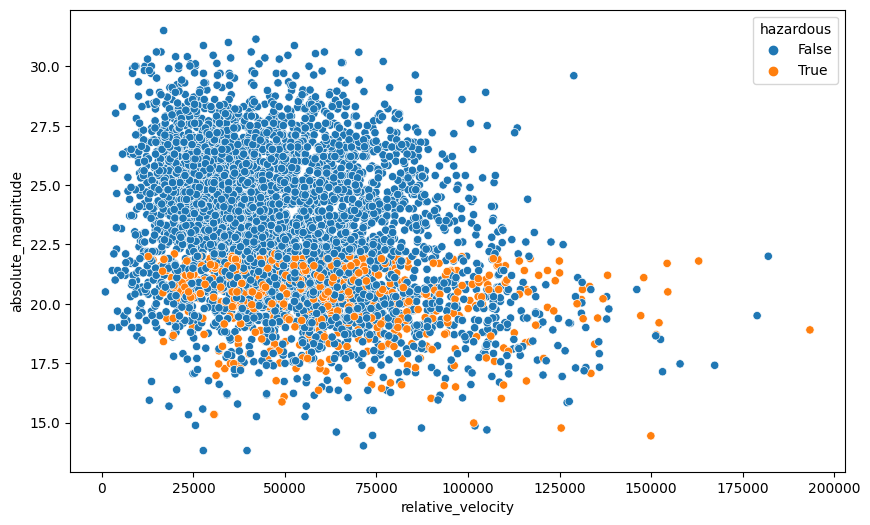

In [876]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='relative_velocity',y='absolute_magnitude',data=df,hue='hazardous')
plt.show()

#### Абсолютная звездная величина (absolute_magnitude) астероида - это визуальная величина, которую наблюдатель зафиксировал бы, если бы астероид находился на расстоянии 1 астрономической единицы (а.е.) и 1 а.е. от Солнца и под нулевым фазовым углом.

# Проводим обучение
### 1. Random Forest - Случайный лес

In [877]:
X

,relative_velocity,absolute_magnitude,miss_distance,prev_hazard
0,13569.249224,16.73,5.483974e+07,False
1,73588.726663,20.00,6.143813e+07,True
2,114258.692129,17.83,4.979872e+07,False
3,24764.303138,22.20,2.543497e+07,False
4,42737.733765,20.09,4.627557e+07,False
...,...,...,...,...
4994,68008.686531,21.60,6.074898e+07,False
4995,56146.668376,26.60,2.078349e+07,False
4996,24868.153345,21.50,1.252865e+07,False
4997,146102.744654,20.60,6.675484e+07,False


In [878]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
4994     True
4995    False
4996    False
4997    False
4998     True
Name: hazardous, Length: 4999, dtype: bool

In [879]:
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier()
Cs = [10,100, 150, 200, 250, 300]
max_depth = [10, 100, 1000]
tuned_parameters = [{'n_estimators': Cs}, {'max_depth': max_depth}]
model = GridSearchCV(RF, tuned_parameters, scoring = 'accuracy', cv=2)
model.fit(X_train, y_train)
model.best_score_, model.best_params_

(0.921577232301672, {'max_depth': 10})

In [880]:
RF = RandomForestClassifier(max_depth=10)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
score = RF.score(X_test,y_test)

In [881]:
score

0.9248

<Axes: >

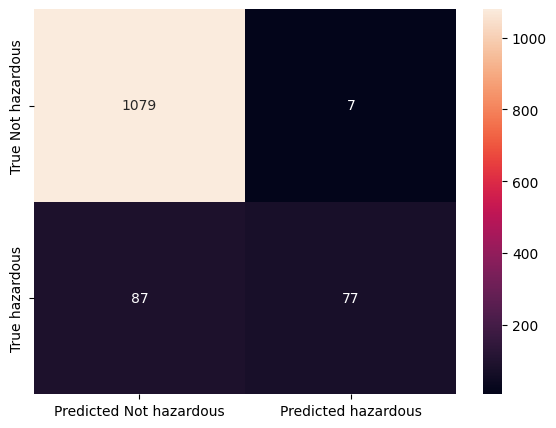

In [882]:
class_names = ['Not hazard', 'hazard']
cnf_matrix = metrics.confusion_matrix(y_test, pred)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Not hazardous', 'True hazardous']
predicted_class_names = ['Predicted Not hazardous', 'Predicted hazardous']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

plt.figure(figsize = (15,5))
plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

In [883]:
print (metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96      1086
        True       0.92      0.47      0.62       164

    accuracy                           0.92      1250
   macro avg       0.92      0.73      0.79      1250
weighted avg       0.92      0.92      0.91      1250



Построим график roc_curve, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак

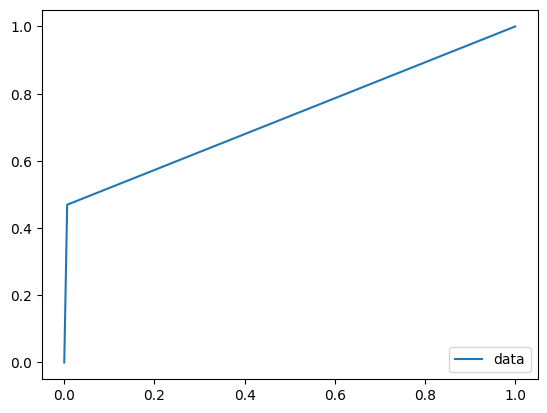

In [884]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
plt.plot(fpr,tpr,label="data")
plt.legend(loc=4)
plt.show()

### 2. Градиентный бустинг - LightGBM

In [885]:
import lightgbm as lgb
LGBM = lgb.LGBMClassifier()
Cs = [10,100, 150, 200, 250, 300]
# Cs Number of boosted trees to fit.
num_leaves = [30, 35, 40, 45, 50]
# Максимальное количество листьев на дереве для базовых учащихся.
learning_rate = [0.01, 0.015, 0.025, 0.05, 0.1]
boosting_type = ['gbdt''rf']


tuned_parameters = [{'n_estimators': Cs}, {'num_leaves': num_leaves}, {'learning_rate': learning_rate}, {'boosting_type': boosting_type}]              
model = GridSearchCV(LGBM, tuned_parameters, scoring = 'accuracy', cv=2)
model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

0.923444468160797 {'learning_rate': 0.015}


In [886]:
LGBM = lgb.LGBMClassifier(learning_rate=0.01)
LGBM.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01)

In [887]:
lgbm_pred=LGBM.predict(X_test)
lgbm_score = LGBM.score(X_test,y_test)
lgbm_score

0.9224

<Axes: >

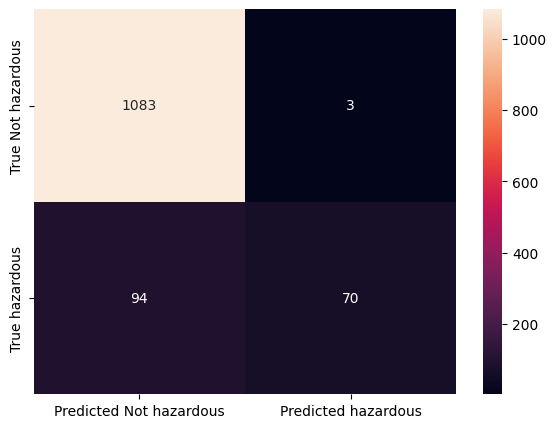

In [888]:
class_names = ['Survived', 'Not Survived']
cnf_matrix = metrics.confusion_matrix(y_test, lgbm_pred)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Not hazardous', 'True hazardous']
predicted_class_names = ['Predicted Not hazardous', 'Predicted hazardous']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)


plt.figure(figsize = (15,5))
plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

### 3. Метод опорных векторов - Support vector machines (SVM)

In [889]:
from sklearn import svm
CVM = svm.SVC()
# Параметр регуляризации или сглаживания
C = [0.1, 1, 10, 100, 1000]
gamma = [100, 10, 0.1, 0.01, 0.001, 0.0001]

tuned_parameters = [{'C': C, 'gamma': gamma}]
model = GridSearchCV(CVM, tuned_parameters,  scoring = 'accuracy', cv=2)
model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

0.871965848452508 {'C': 1, 'gamma': 0.1}


In [890]:
CVM = svm.SVC(C=1,gamma=0.1)
CVM.fit(X_train, y_train)
cvm_pred = CVM.predict(X_test)
cvm_score = CVM.score(X_test,y_test)

In [891]:
cvm_score

0.8792

<Axes: >

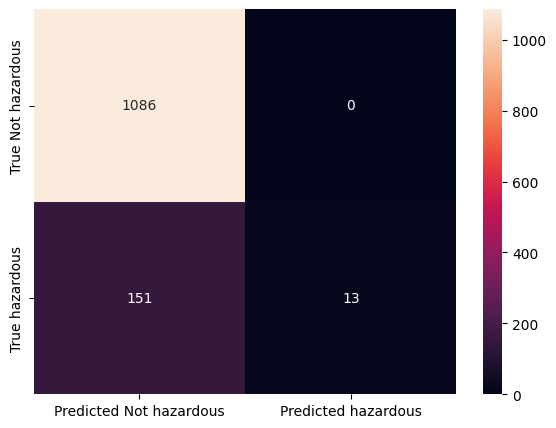

In [892]:
class_names = ['hazard', 'not hazard']
cnf_matrix = metrics.confusion_matrix(y_test, cvm_pred)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Not hazardous', 'True hazardous']
predicted_class_names = ['Predicted Not hazardous', 'Predicted hazardous']


df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

plt.figure(figsize = (15,5))
plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

In [893]:
print (metrics.classification_report(y_test, cvm_pred))

              precision    recall  f1-score   support

       False       0.88      1.00      0.93      1086
        True       1.00      0.08      0.15       164

    accuracy                           0.88      1250
   macro avg       0.94      0.54      0.54      1250
weighted avg       0.89      0.88      0.83      1250



In [894]:
metrics.roc_curve(y_test, cvm_pred)

(array([0., 0., 1.]),
 array([0.        , 0.07926829, 1.        ]),
 array([2, 1, 0]))

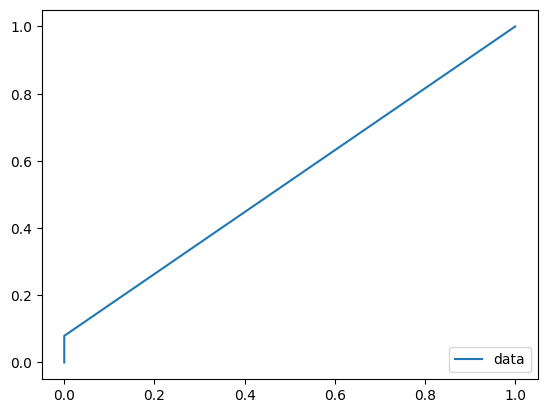

In [895]:
fpr, tpr, _ = metrics.roc_curve(y_test, cvm_pred)
plt.plot(fpr,tpr,label="data")
plt.legend(loc=4)
plt.show()

### 4. k-Nearest Neighbors (k-Ближайших соседей)

In [896]:
from sklearn.neighbors import KNeighborsClassifier

In [897]:
KNN = KNeighborsClassifier()
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
tuned_parameters = [{'n_neighbors': [1, 2, 3, 5, 10, 15, 20, 25, 30, 40, 50, 60]},
                    {'leaf_size': [1, 3, 5, 10, 15, 20, 50, 100]},
                    {'weights': weights},
                    {'algorithm': algorithm}]
model = GridSearchCV(KNN, tuned_parameters,  scoring = 'accuracy', cv=2)
model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

0.8687649946638207 {'n_neighbors': 30}


In [898]:
KNN = KNeighborsClassifier(n_neighbors = 30)
KNN.fit(X_train, y_train)
knn_pred = KNN.predict(X_test)
knn_score = KNN.score(X_test,y_test)

In [899]:
knn_score

0.8688

<Axes: >

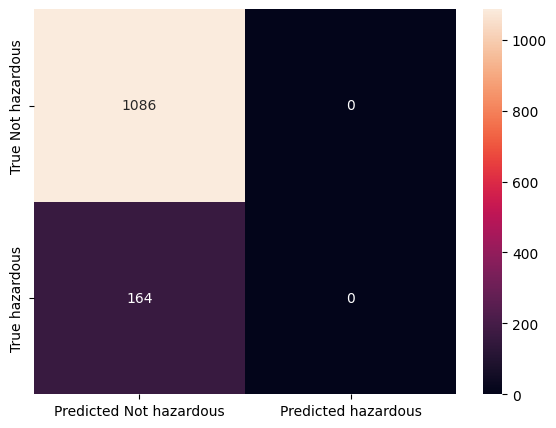

In [900]:
class_names = ['hazard', 'not hazard']
cnf_matrix = metrics.confusion_matrix(y_test, knn_pred)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Not hazardous', 'True hazardous']
predicted_class_names = ['Predicted Not hazardous', 'Predicted hazardous']


df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

plt.figure(figsize = (15,5))
plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

In [901]:
print (metrics.classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

       False       0.87      1.00      0.93      1086
        True       0.00      0.00      0.00       164

    accuracy                           0.87      1250
   macro avg       0.43      0.50      0.46      1250
weighted avg       0.75      0.87      0.81      1250



In [902]:
metrics.roc_curve(y_test, knn_pred)

(array([0., 1.]), array([0., 1.]), array([1, 0]))

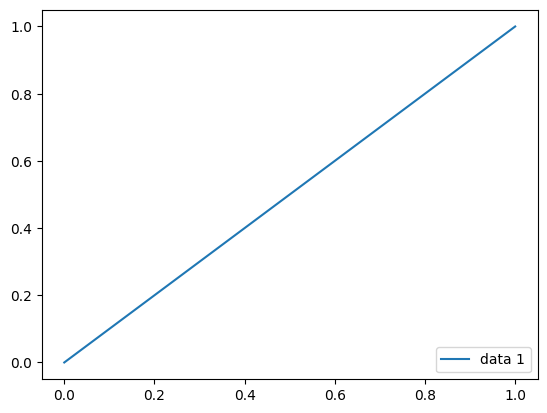

In [903]:
fpr, tpr, _ = metrics.roc_curve(y_test, knn_pred)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

### 5. Ансамбль

In [904]:
from sklearn.ensemble import VotingClassifier

In [905]:
ensemble = VotingClassifier(estimators=[ ('rf', RF), ('lgbm', LGBM),('cvm', CVM),('knn', KNN)], voting='hard')

In [906]:
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_score = ensemble.score(X_test,y_test)

In [907]:
ensemble_score

0.8752

<Axes: >

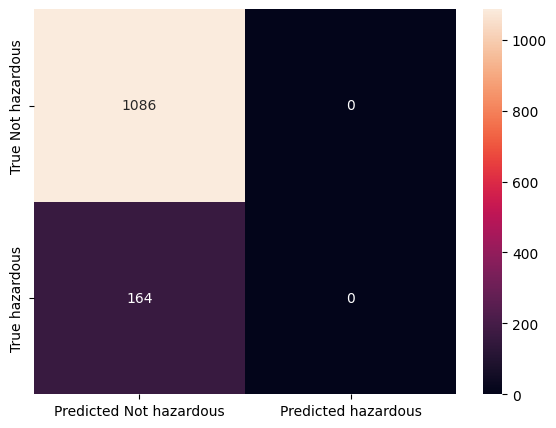

In [908]:
class_names = ['hazard', 'not hazard']
cnf_matrix = metrics.confusion_matrix(y_test, knn_pred)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Not hazardous', 'True hazardous']
predicted_class_names = ['Predicted Not hazardous', 'Predicted hazardous']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)


plt.figure(figsize = (15,5))
plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

In [909]:
print (metrics.classification_report(y_test, ensemble_pred))

              precision    recall  f1-score   support

       False       0.87      1.00      0.93      1086
        True       1.00      0.05      0.09       164

    accuracy                           0.88      1250
   macro avg       0.94      0.52      0.51      1250
weighted avg       0.89      0.88      0.82      1250



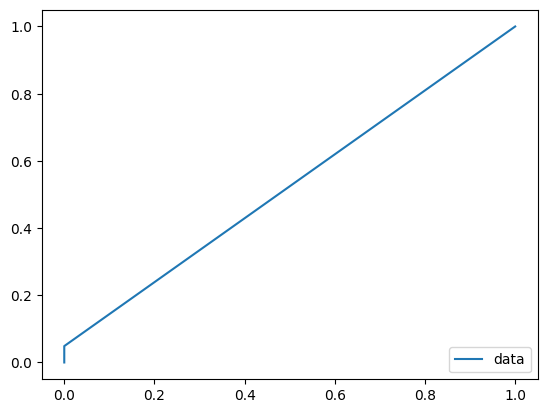

In [910]:
fpr, tpr, _ = metrics.roc_curve(y_test, ensemble_pred)
plt.plot(fpr,tpr,label="data")
plt.legend(loc=4)
plt.show()

In [911]:
import joblib
filename = '/content/rf.pkl'
_ = joblib.dump(RF, filename, compress=9)
filename = '/content/lgbm.pkl'
_ = joblib.dump(LGBM, filename, compress=9)
filename = '/content/cvm.pkl'
_ = joblib.dump(CVM, filename, compress=9)
filename = '/content/knn.pkl'
_ = joblib.dump(KNN, filename, compress=9)
filename = '/content/eclf.pkl'
_ = joblib.dump(ensemble, filename, compress=9)